# PRODIGY INFOTECH - DATA SCIENCE INTERNSHIP

## Name: Prajakta Shivanand Karate

## Task - 04

## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

from wordcloud import WordCloud

from warnings import filterwarnings
filterwarnings(action='ignore')

## Loading the datasets

In [2]:
training=pd.read_csv("twitter_training.csv")
test=pd.read_csv("twitter_validation.csv")

In [3]:
training.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [4]:
test.head()

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


## Add headers for the columns in each dataframe:-

In [5]:
test.columns = ['id', 'company','sentiment','tweets']
training.columns = ['id', 'company','sentiment','tweets']

In [6]:
# Display the first few rows of both datasets
print(training.head())
print("---------------------------------------------------------------------")
print(test.head())

     id      company sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                              tweets  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  
---------------------------------------------------------------------
     id    company sentiment  \
0   352     Amazon   Neutral   
1  8312  Microsoft  Negative   
2  4371      CS-GO  Negative   
3  4433     Google   Neutral   
4  6273       FIFA  Negative   

                                              tweets  
0  BBC News - Amazon boss Jeff Bezos rejects clai...  
1  @Microsoft Why do I pay for WORD when it funct...  
2  CSGO matchmaking is so full of clo

## Merging two datasets together in one dataframe

In [7]:
sentiment=pd.concat([training,test],ignore_index=True)
sentiment

,id,company,sentiment,tweets
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
75675,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
75678,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


## Exploratory data analysis

In [8]:
# Summary of the dataset
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         75680 non-null  int64 
 1   company    75680 non-null  object
 2   sentiment  75680 non-null  object
 3   tweets     74994 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [9]:
# provides summary statistics for numerical columns in the dataset
sentiment.describe()

,id
count,75680.000000
mean,6432.673401
std,3740.247541
min,1.000000
25%,3196.000000
50%,6423.500000
75%,9602.000000
max,13200.000000


In [10]:
sentiment.shape

(75680, 4)

In [11]:
sentiment.columns

Index(['id', 'company', 'sentiment', 'tweets'], dtype='object')

In [12]:
print(sentiment['sentiment'].value_counts())

sentiment
Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13161
Name: count, dtype: int64


## Data Cleaning and Data Processing

In [13]:
sentiment.isnull()

,id,company,sentiment,tweets
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
75675,False,False,False,False
75676,False,False,False,False
75677,False,False,False,False
75678,False,False,False,False


In [14]:
# Calculates the missing values
sentiment.isnull().sum()

id             0
company        0
sentiment      0
tweets       686
dtype: int64

In [15]:
# removes rows with missing values
sentiment.dropna(inplace=True)
sentiment.isnull().sum()

id           0
company      0
sentiment    0
tweets       0
dtype: int64

In [16]:
# removes duplicate rows
sentiment.drop_duplicates(inplace=True)

In [17]:
# calculates the number of duplicate rows
sentiment.duplicated().sum()

0

In [18]:
# Convert text to lowercase
sentiment['tweets'] = sentiment['tweets'].str.lower()

In [19]:
# Remove punctuation and special characters
sentiment['tweets'] = sentiment['tweets'].str.replace('[^\w\s]', '')

In [20]:
sentiment.head(10)

,id,company,sentiment,tweets
0,2401,Borderlands,Positive,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,so i spent a few hours making something for fu...
6,2402,Borderlands,Positive,so i spent a couple of hours doing something f...
7,2402,Borderlands,Positive,so i spent a few hours doing something for fun...
8,2402,Borderlands,Positive,so i spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 so i spent a few hours making something f...


## Data Visualization

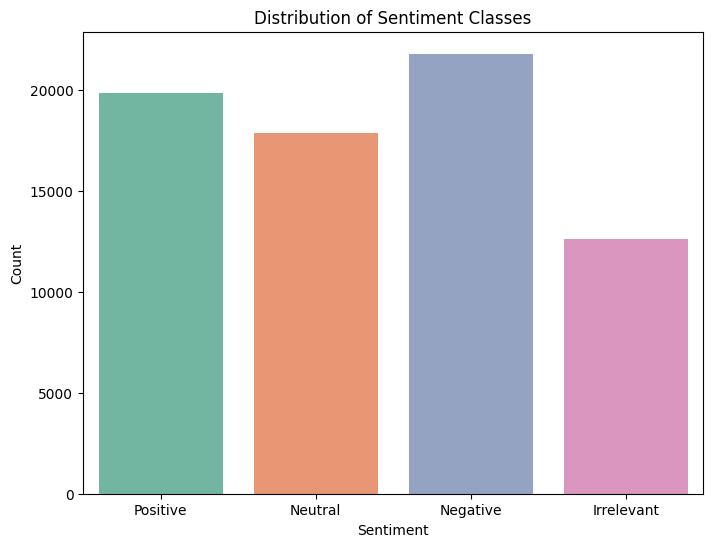

In [21]:
# Distribution of Sentiment Classes:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=sentiment, palette='Set2')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

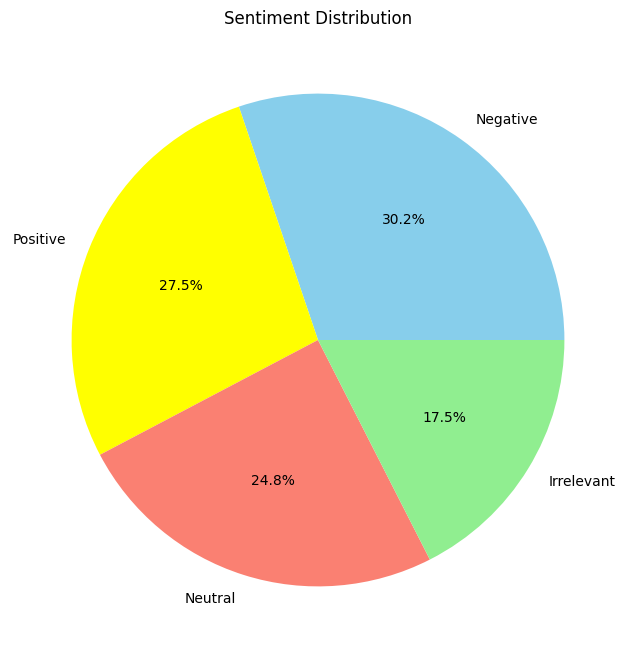

In [22]:
plt.figure(figsize=(8, 8))
sentiment_counts = sentiment['sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['skyblue','yellow', 'salmon', 'lightgreen'])
plt.title('Sentiment Distribution')
plt.show()

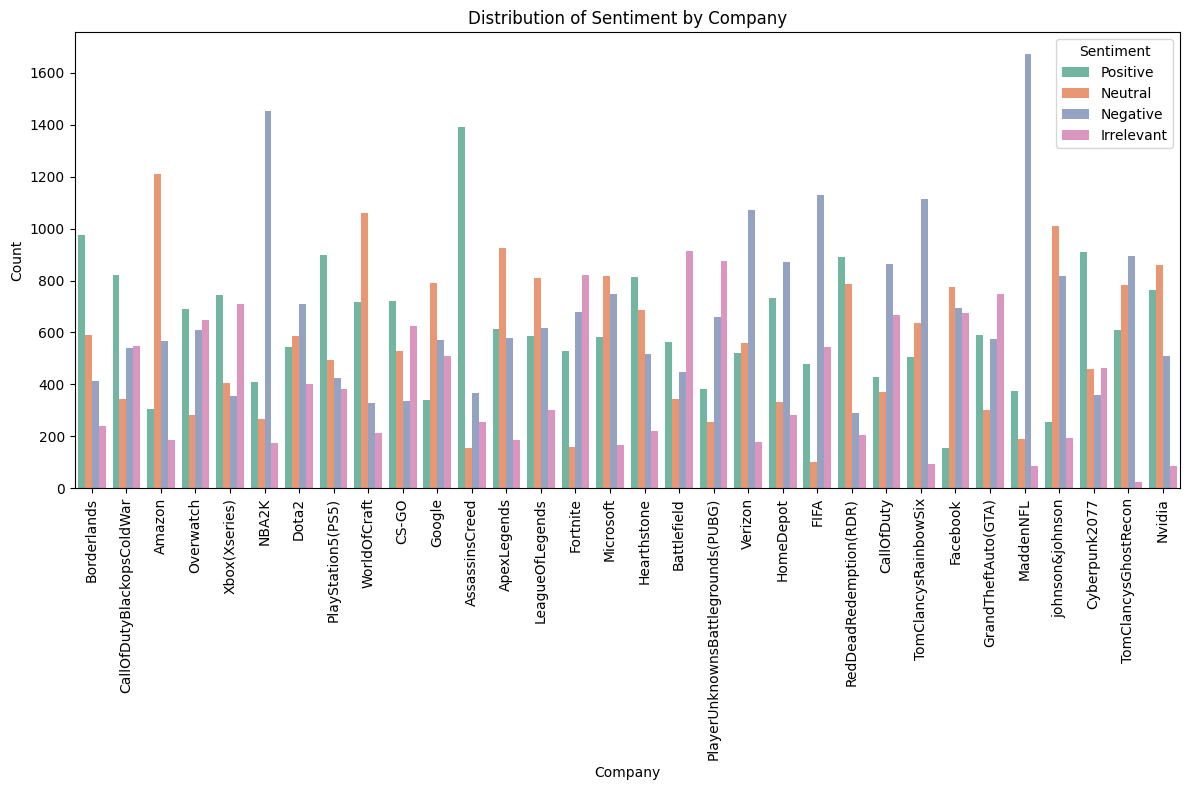

In [23]:
# Distribution of Sentiment by Company
plt.figure(figsize=(12, 8))
sns.countplot(x='company', hue='sentiment', data=sentiment, palette='Set2')
plt.title('Distribution of Sentiment by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=90)  
plt.legend(title='Sentiment')
plt.tight_layout()  
plt.show()

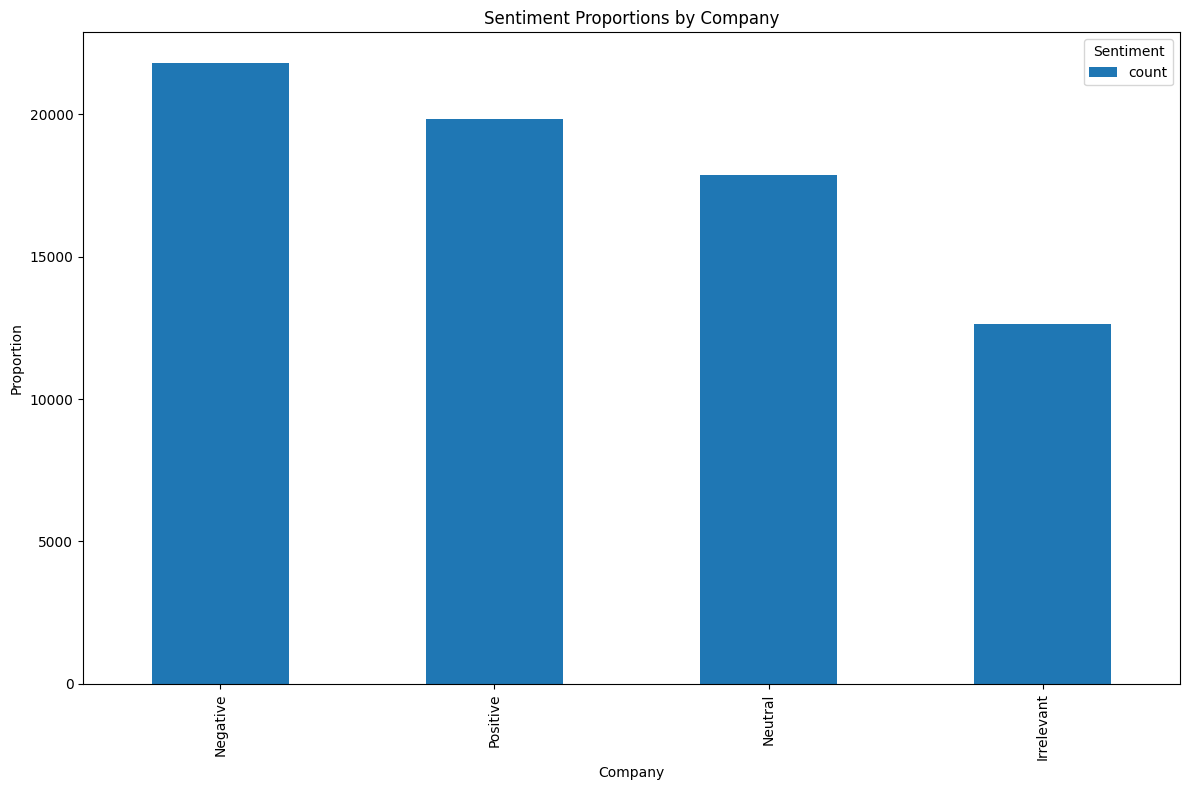

In [31]:
#Stacked Bar Plot of Sentiment Proportions by Company:
plt.figure(figsize=(12,8))  
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Proportions by Company')
plt.xlabel('Company')
plt.ylabel('Proportion')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

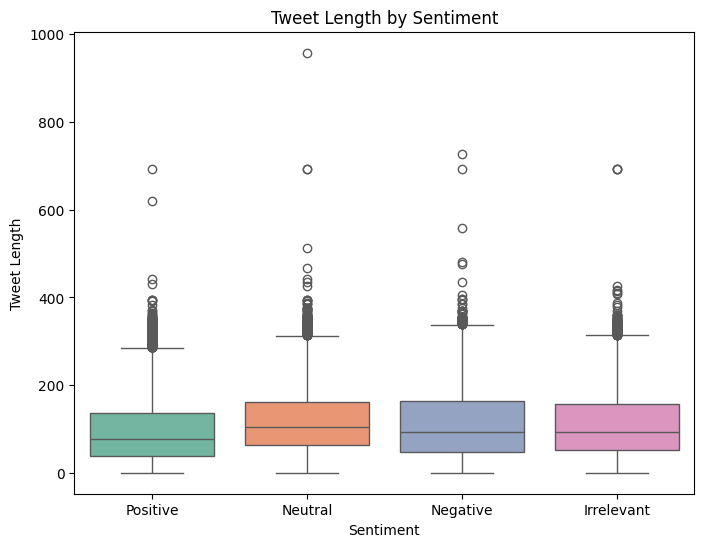

In [25]:
# Boxplot of Tweet Length by Sentiment
sentiment['tweet_length'] = sentiment['tweets'].apply(len)

plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='tweet_length', data=sentiment, palette='Set2')
plt.title('Tweet Length by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

# Key Insights

## Word Cloud for Positive and Negative Sentiment:

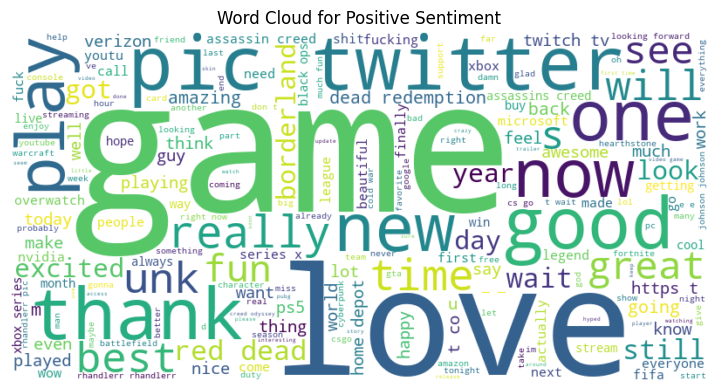

In [26]:
# Word Cloud for positive sentiment

positive_text = ' '.join(sentiment[sentiment['sentiment'] == 'Positive']['tweets'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment')
plt.axis('off')
plt.show()

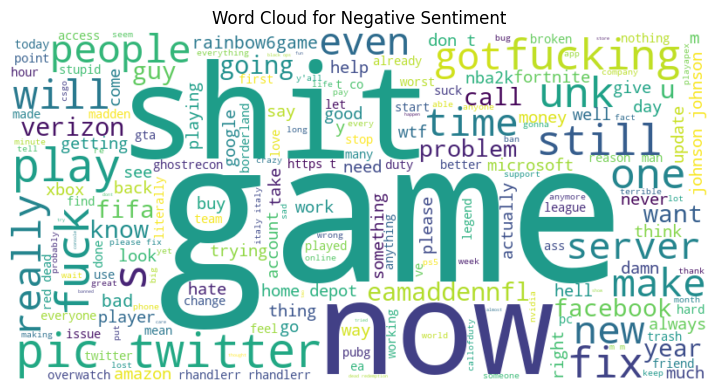

In [27]:
# World Cloud for negative sentiment

negative_tweets = ' '.join(sentiment[sentiment['sentiment'] == 'Negative']['tweets'])

plt.figure(figsize=(9, 6))
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_tweets)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Sentiment')
plt.axis('off')
plt.show()

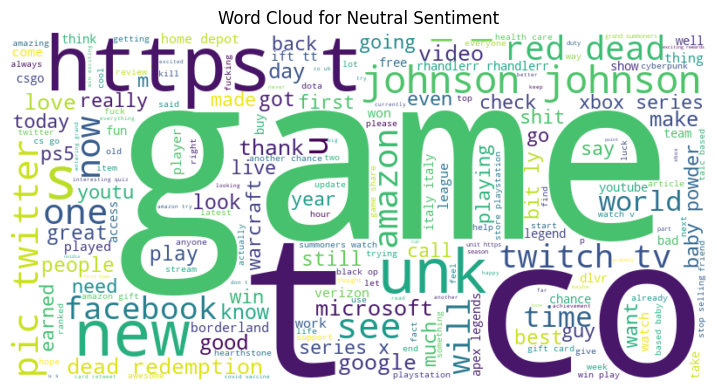

In [28]:
# World Cloud for neutral sentiment

neutral_tweets = ' '.join(sentiment[sentiment['sentiment'] == 'Neutral']['tweets'])

plt.figure(figsize=(9, 6))
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white').generate(neutral_tweets)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.title('Word Cloud for Neutral Sentiment')
plt.axis('off')
plt.show()

In [32]:
!pip install textblob

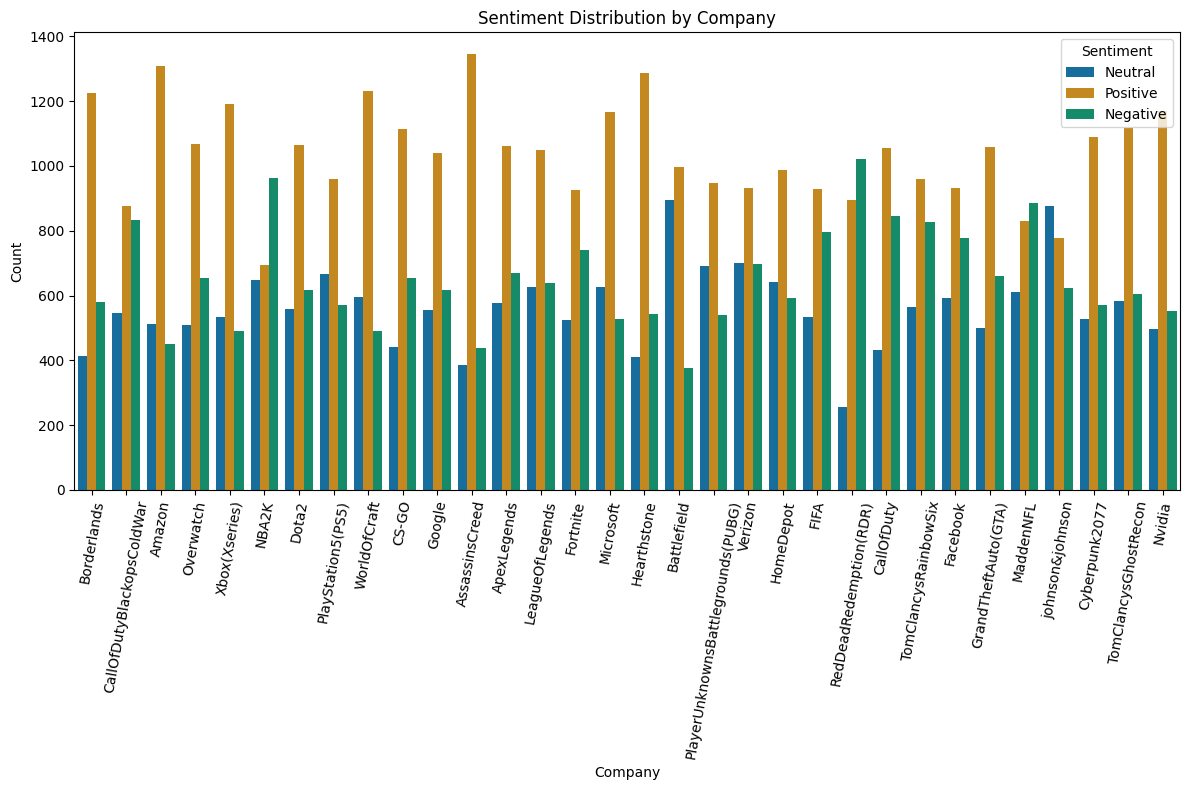

In [38]:
# Conducting sentiment analysis using natural language processing techniques
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

sentiment['sentiment'] = sentiment['tweets'].apply(get_sentiment)

# Visualizing sentiment distribution by company, entity, and sentiment class
plt.figure(figsize=(12, 8))
sns.countplot(x='company', hue='sentiment', data=sentiment, palette='colorblind')
plt.title('Sentiment Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

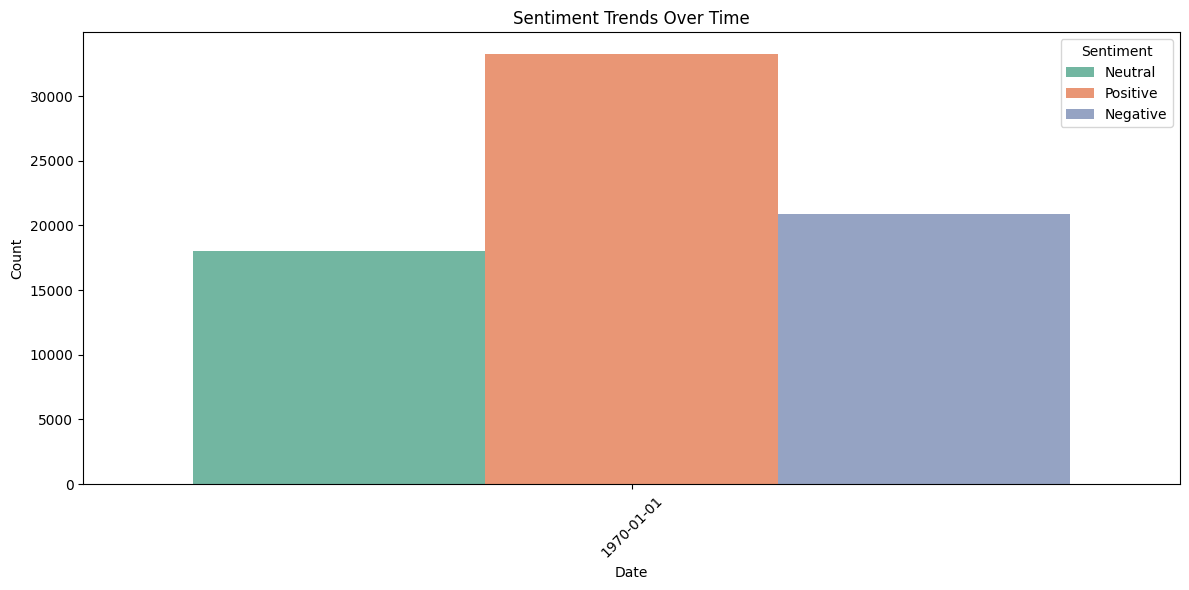

In [44]:
# Identified sentiment trends over time to understand evolving public opinions:

sentiment.index = pd.to_datetime(sentiment.index)
plt.figure(figsize=(12, 6))
sns.countplot(x=sentiment.index.date, hue='sentiment', data=sentiment, palette='Set2')
plt.title('Sentiment Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

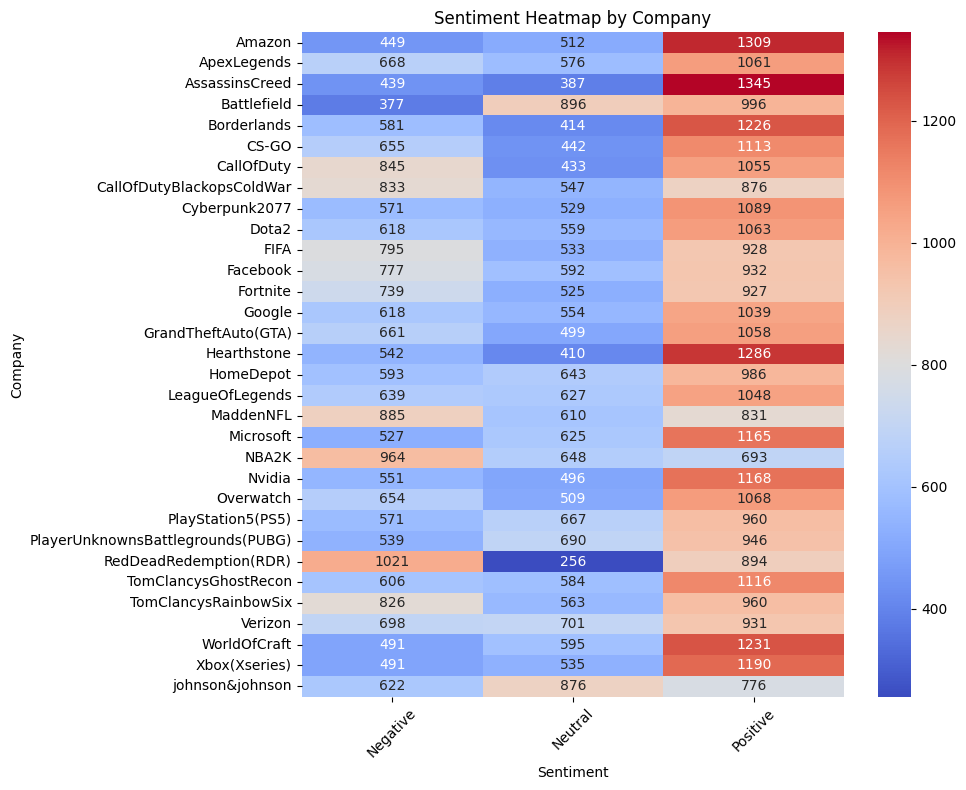

In [41]:
# Explore additional techniques like topic modeling and sentiment heatmaps for more nuanced analysis

plt.figure(figsize=(10, 8))
sentiment_heatmap = sentiment.pivot_table(index='company', columns='sentiment', aggfunc='size', fill_value=0)
sns.heatmap(sentiment_heatmap, cmap='coolwarm', annot=True, fmt='d')
plt.title('Sentiment Heatmap by Company')
plt.xlabel('Sentiment')
plt.ylabel('Company')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()